In [441]:
from logging import warning
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder

from sklearn.compose import ColumnTransformer




In [442]:
df=pd.read_csv('Travel.csv')

In [443]:
df.head(3)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0


In [445]:
df['MaritalStatus'].value_counts()
df['MaritalStatus'].replace('Single','Unmarried',inplace=True)

In [446]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [447]:
df['Gender'].replace('Fe Male','Female',inplace=True)

In [448]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [449]:
feature_NA= [col for col in df.columns if df[col].isnull().sum()>1]
for feature in feature_NA:
    print(feature,np.round(df[feature].isnull().mean()*100,5)," % missing values")


Age 4.62357  % missing values
TypeofContact 0.51146  % missing values
DurationOfPitch 5.13502  % missing values
NumberOfFollowups 0.92062  % missing values
PreferredPropertyStar 0.53191  % missing values
NumberOfTrips 2.86416  % missing values
NumberOfChildrenVisiting 1.35025  % missing values
MonthlyIncome 4.76678  % missing values


In [450]:

print(df['TypeofContact'].mode())

0    Self Enquiry
Name: TypeofContact, dtype: object


In [451]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['TypeofContact'].fillna(df['TypeofContact'].mode()[0],inplace=True)
df['DurationOfPitch'].fillna(df['DurationOfPitch'].median(),inplace=True)
df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].median(),inplace=True)
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].median(),inplace=True)
df['NumberOfTrips'].fillna(df['NumberOfTrips'].median(),inplace=True)
df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].median(),inplace=True)
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(),inplace=True)
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)


In [452]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [453]:
df.head(3)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0


In [454]:
df.drop(['CustomerID'],axis=1,inplace=True)

In [371]:
df.head(3)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0


In [455]:
df['total_visiting']=df['NumberOfPersonVisiting']+df['NumberOfChildrenVisiting']
df.drop(['NumberOfPersonVisiting','NumberOfChildrenVisiting'],axis=1,inplace=True)

In [456]:
df.head(2)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,total_visiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0


In [457]:
num_feature= [feature for feature in df.columns if df[feature].dtype!='object']
print("Numerical features:",len(num_feature))


Numerical features: 12


In [458]:
cat_feature= [features for features in df.columns if df[features].dtype=='object']
print("Categorical features:",len(cat_feature))

Categorical features: 6


In [459]:
discrete_feature= [feature for feature in num_feature if len(df[feature].unique())<=25]
print("Discrete features:",len(discrete_feature))

Discrete features: 9


In [460]:
continuous_feature= [feature for feature in num_feature if feature not in discrete_feature]
print("Continuous features:",len(continuous_feature))
df.head(3)

Continuous features: 3


,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,total_visiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0


In [461]:
X=df.drop(['ProdTaken'],axis=1)
y=df['ProdTaken']

In [462]:
X.head(3)

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,total_visiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0


In [463]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [464]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=30)


In [465]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3910, 17)
(978, 17)
(3910,)
(978,)


In [466]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4888 non-null   float64
 1   TypeofContact           4888 non-null   object 
 2   CityTier                4888 non-null   int64  
 3   DurationOfPitch         4888 non-null   float64
 4   Occupation              4888 non-null   object 
 5   Gender                  4888 non-null   object 
 6   NumberOfFollowups       4888 non-null   float64
 7   ProductPitched          4888 non-null   object 
 8   PreferredPropertyStar   4888 non-null   float64
 9   MaritalStatus           4888 non-null   object 
 10  NumberOfTrips           4888 non-null   float64
 11  Passport                4888 non-null   int64  
 12  PitchSatisfactionScore  4888 non-null   int64  
 13  OwnCar                  4888 non-null   int64  
 14  Designation             4888 non-null   

In [467]:
cat_feature= X.select_dtypes(include='object').columns
print(type(cat_feature))
print(list(cat_feature))
num_feature=X.select_dtypes(exclude='object').columns   
print(num_feature)

<class 'pandas.core.indexes.base.Index'>
['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']
Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'total_visiting'],
      dtype='object')


In [468]:
standardscalar= StandardScaler()
onehotencoder= OneHotEncoder(drop='first')
print(onehotencoder)

OneHotEncoder(drop='first')


In [469]:
columTranformer = ColumnTransformer([
                                        ("OneHotEncoding",onehotencoder,cat_feature),
                                    ("StandardScaling",standardscalar,num_feature)
                                    ]
                                    )

In [380]:
print(columTranformer)

ColumnTransformer(transformers=[('OneHotEncoding', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaling', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'total_visiting'],
      dtype='object'))])


In [470]:
X_train=columTranformer.fit_transform(X_train)
print(X_train)
print(type(X_train))


[[ 1.          0.          1.         ...  0.78296635 -0.97104459
  -0.05410701]
 [ 1.          0.          1.         ...  0.78296635  2.28875665
  -0.05410701]
 [ 1.          0.          1.         ... -1.2771941   0.19966399
   0.65344619]
 ...
 [ 1.          0.          1.         ...  0.78296635 -0.42864325
   0.65344619]
 [ 0.          0.          1.         ... -1.2771941   0.27670963
  -0.05410701]
 [ 1.          0.          1.         ...  0.78296635 -0.49991047
   0.65344619]]
<class 'numpy.ndarray'>


In [471]:
print(type(X_train))

<class 'numpy.ndarray'>


In [472]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.71512,-0.405223,-0.699565,-0.723537,-1.213790,1.57339,-0.040232,0.782966,-0.971045,-0.054107
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.71512,-0.769485,0.292924,-0.723537,-0.125526,1.57339,0.688040,0.782966,2.288757,-0.054107
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-0.71512,2.023195,1.285412,-0.723537,-0.669658,-0.63557,0.688040,-1.277194,0.199664,0.653446
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.46509,-0.769485,0.292924,0.533810,-0.669658,-0.63557,1.416312,0.782966,-0.012404,2.068553
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.71512,-0.162381,-0.699565,0.533810,0.418606,-0.63557,-1.496776,0.782966,1.516759,-0.761660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.46509,0.444723,0.292924,-0.723537,0.962738,1.57339,-0.040232,0.782966,2.313411,0.653446
3906,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.71512,1.051828,-0.699565,-0.723537,2.051001,-0.63557,-0.040232,0.782966,0.378410,-0.054107
3907,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.71512,-0.040960,-0.699565,-0.723537,-0.669658,1.57339,1.416312,0.782966,-0.428643,0.653446
3908,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.71512,-1.012327,0.292924,-0.723537,-0.125526,-0.63557,-0.040232,-1.277194,0.276710,-0.054107


In [473]:
X_test=columTranformer.transform(X_test)
print(X_test)
print(type(X_test))

[[ 1.          0.          1.         ...  0.78296635 -0.45368308
   0.65344619]
 [ 1.          0.          1.         ... -1.2771941  -0.24026665
  -0.05410701]
 [ 1.          0.          1.         ... -1.2771941   2.83077276
  -0.05410701]
 ...
 [ 1.          0.          1.         ... -1.2771941  -0.07018839
   0.65344619]
 [ 1.          1.          0.         ...  0.78296635  0.10412739
  -0.05410701]
 [ 1.          1.          0.         ...  0.78296635 -0.42613927
   0.65344619]]
<class 'numpy.ndarray'>


In [474]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.715120,2.387458,0.292924,-0.723537,1.506869,-0.63557,1.416312,0.782966,-0.453683,0.653446
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.715120,-1.012327,1.285412,-0.723537,-0.125526,1.57339,-0.768504,-1.277194,-0.240267,-0.054107
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.715120,-0.162381,0.292924,1.791156,2.051001,-0.63557,1.416312,-1.277194,2.830773,-0.054107
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.715120,-0.769485,0.292924,1.791156,1.506869,-0.63557,0.688040,0.782966,-0.287457,0.653446
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.715120,1.901774,1.285412,-0.723537,-0.669658,-0.63557,-1.496776,-1.277194,-1.204686,-1.469213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.715120,-0.283802,-0.699565,-0.723537,0.962738,1.57339,-0.040232,-1.277194,-0.231214,-0.761660
974,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.715120,1.537511,0.292924,-0.723537,-0.125526,-0.63557,-1.496776,-1.277194,-0.415353,-0.054107
975,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-0.715120,-0.283802,1.285412,0.533810,2.595133,-0.63557,-0.040232,-1.277194,-0.070188,0.653446
976,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.374985,0.080461,0.292924,-0.723537,-0.125526,-0.63557,-1.496776,0.782966,0.104127,-0.054107


In [475]:
#ML-trainingfrom RF
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score, f1_score,roc_auc_score,precision_score


In [476]:
model={
    'RandomForest':RandomForestClassifier()

}
for modelname in range(len(list(model))):
    modelone=list(model.values())[modelname]
    print(modelone)
    modelone.fit(X_train,y_train)
    y_train_pred=modelone.predict(X_train)
    y_test_pred=modelone.predict(X_test)


    


RandomForestClassifier()


In [477]:
model_train_accuracy= accuracy_score(y_train,y_train_pred)
f1_score_train1= f1_score(y_train,y_train_pred)
model_train_precicion= precision_score(y_train,y_train_pred)
model_train_recall= recall_score(y_train,y_train_pred)
model_train_roc_auc= roc_auc_score(y_train,y_train_pred)


In [478]:

model_test_accuracy= accuracy_score(y_test,y_test_pred)
f1_score_test= f1_score(y_test,y_test_pred)
model_test_precicion= precision_score(y_test,y_test_pred)
model_test_recall= recall_score(y_test,y_test_pred)
model_test_roc_auc= roc_auc_score(y_test,y_test_pred)


In [483]:
print(list(model.keys())[modelname])
print("Train Accuracy:",model_train_accuracy)
print("Train F1 Score:",f1_score_train1)
print("Train Precision:",model_train_precicion)
print("Train Recall:",model_train_recall)
print("Train ROC_AUC:",model_train_roc_auc)
print("--------------------------------------------------")
print("Test Accuracy:",model_test_accuracy)
print("Test F1 Score:",f1_score_test)
print("Test Precision:",model_test_precicion)
print("Test Recall:",model_test_recall)
print("Test ROC_AUC:",model_test_roc_auc)


RandomForest
Train Accuracy: 1.0
Train F1 Score: 1.0
Train Precision: 1.0
Train Recall: 1.0
Train ROC_AUC: 1.0
--------------------------------------------------
Test Accuracy: 0.9406952965235174
Test F1 Score: 0.81875
Test Precision: 0.9632352941176471
Test Recall: 0.7119565217391305
Test ROC_AUC: 0.8528296462599934


In [514]:
random_forstParams= {"n_estimators":[100,200,1000],'max_depth':[None,5,10],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4],'random_state':[42]}


In [515]:
hyperRandomSearchcvRF=[('RF',RandomForestClassifier(),random_forstParams)]

In [516]:
hyperRandomSearchcvRF

[('RF',
  RandomForestClassifier(),
  {'n_estimators': [100, 200, 1000],
   'max_depth': [None, 5, 10],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4],
   'random_state': [42]})]

In [517]:

from sklearn.model_selection import RandomizedSearchCV
model_parameters= {}
for name,model,params in hyperRandomSearchcvRF:
    random_search= RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=5,verbose=2,n_jobs=-1)
    random_search.fit(X_train,y_train)
    model_parameters[name] = random_search.best_params_
    print(f"model_parameters best params {name}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
model_parameters best params RF


In [518]:
print(model_parameters[name])

{'random_state': 42, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}


In [519]:


model={
    'RandomForest':RandomForestClassifier(n_estimators=200,max_depth=None,min_samples_leaf=1,min_samples_split=2,random_state=42)

}
for modelname in range(len(list(model))):
    modelone=list(model.values())[modelname]
    print(modelone)
    modelone.fit(X_train,y_train)
    y_train_pred= modelone.predict(X_train)
    y_test_pred= modelone.predict(X_test)
    print(name)
    model_train_accuracy= accuracy_score(y_train,y_train_pred)  
    f1_score_train1= f1_score(y_train,y_train_pred)
    model_train_precicion= precision_score(y_train,y_train_pred)
    model_train_recall= recall_score(y_train,y_train_pred)
    model_train_roc_auc= roc_auc_score(y_train,y_train_pred)
    print("Train Accuracy:",model_train_accuracy)
    print("Train F1 Score:",f1_score_train1)
    print("Train Precision:",model_train_precicion)
    print("Train Recall:",model_train_recall)
    print("Train ROC_AUC:",model_train_roc_auc)
    print("--------------------------------------------------")
    model_test_accuracy= accuracy_score(y_test,y_test_pred)
    f1_score_test= f1_score(y_test,y_test_pred)
    model_test_precicion= precision_score(y_test,y_test_pred)
    model_test_recall= recall_score(y_test,y_test_pred)
    model_test_roc_auc= roc_auc_score(y_test,y_test_pred)
    print("Test Accuracy:",model_test_accuracy)
    print("Test F1 Score:",f1_score_test)
    print("Test Precision:",model_test_precicion)
    print("Test Recall:",model_test_recall)
    print("Test ROC_AUC:",model_test_roc_auc)
    print("=============================================")


RandomForestClassifier(n_estimators=200, random_state=42)
RF
Train Accuracy: 1.0
Train F1 Score: 1.0
Train Precision: 1.0
Train Recall: 1.0
Train ROC_AUC: 1.0
--------------------------------------------------
Test Accuracy: 0.9355828220858896
Test F1 Score: 0.8012618296529969
Test Precision: 0.9548872180451128
Test Recall: 0.6902173913043478
Test ROC_AUC: 0.8413303581206877


In [523]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [524]:
auc_models= [{'label':'Random Forest Classifier','model':RandomForestClassifier(n_estimators=200,max_depth=None,min_samples_leaf=1,min_samples_split=2,random_state=42), 'auc':0.8413}]


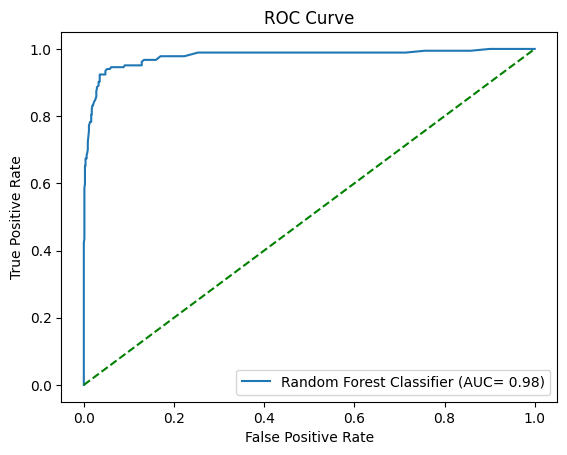

In [534]:
for test in auc_models:
    model = test['model']
    model.fit(X_train,y_train)
    fpr,tpr,thresholds= roc_curve(y_test,model.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label='%s (AUC= %0.2f)' % (test['label'],roc_auc_score(y_test,model.predict_proba(X_test)[:,1])))
    plt.plot([0,1],[0,1],'g--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.savefig("ROC Curve.png")
    plt.legend()
    plt.show()


In [350]:
testingdic= {'1':'hello','21':'hi','3':'hey'}
for test in range(len(list(testingdic))):
    model= list(testingdic.values())[test]
    print(model)
    

hello
hi
hey


In [ ]:
testingdic['1']
testingdic['2']
for test,yet in testingdic.items():
    print(test,yet)
    


1 hello
2 hi
3 hey


In [332]:
for val in testingdic.values():
    print(val)
    break

hello


In [263]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 22],
    'City': ['New York', 'London', 'Paris']
}

df1 = pd.DataFrame(data)
print((df1.select_dtypes(include='object').columns))
print((df1.index))


Index(['Name', 'City'], dtype='object')
RangeIndex(start=0, stop=3, step=1)
